In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.fftpack
import pandas as pd
import numpy as np
from scipy.ndimage.interpolation import shift
from scipy import signal

In [67]:
def my_shifter(b):
    length = len(b)
    end = length
    start = -1 * (end -1)
    #c = np.array[]
    d = []
    for i in range(start,end):
        shifted = shift(b, i, cval=0)
        d.append(shifted)
    return np.vstack(d)   

In [237]:
def my_wavelet_transform(a,my_wave):
    wt = np.dot(my_shifter(a),my_wave)
    length = len(a)
    if length%2 == 1: #if odd
        start = length/2
        end = length/2 * -1
        wt = wt[start:end]
    else:
        start = length/2
        end = length/2 * -1 + 1
        wt = wt[start:end]

    return np.flip(wt,0)

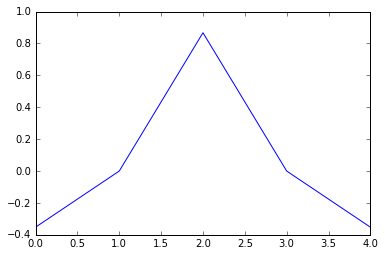

In [238]:
plt.plot(signal.ricker(5,1))

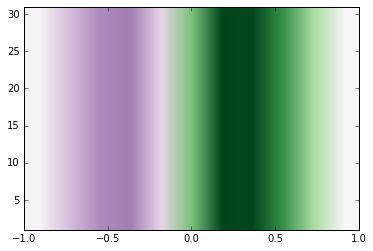

In [243]:
a = np.array([1,0,2,0,1,4,45,0,12,23,4])
width = 2
my_wave = signal.ricker(len(a),width)

widths = [width]
cwtmatr = signal.cwt(a, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [259]:
my_wavelet_transform(a,my_wave) == cwtmatr[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False], dtype=bool)


wt = np.dot(my_shifter(a),my_wave)
#print wt
length = len(wt)
#print length
start = length/4
end = length/4 * -1
wt = wt[start:end]

    
wt